# Intro

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from explorer_helper import *

In [2]:
df = get_df()
df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
00cc618a793e3dc4332b5cdb5a3be2cc66a00af8,10000.0,None,False,{'exp_hash': '00cc618a793e3dc4332b5cdb5a3be2cc...,"Experiment(id=820, name=lions)",SPXOptions3,820,N<DKLGPModel>,None,8bfe64795991cf9cc1c546bf112fe9145a128fca,N<DKLGPModel> SPXOptions3,NaN,NaN,1.482622e+02,2.964239e+01,7.000000,242.720000,default
00cc618a793e3dc4332b5cdb5a3be2cc66a00af8,10000.0,None,False,{'exp_hash': '00cc618a793e3dc4332b5cdb5a3be2cc...,"Experiment(id=912, name=lions)",SPXOptions3,912,N<DKLGPModel>,None,8bfe64795991cf9cc1c546bf112fe9145a128fca,N<DKLGPModel> SPXOptions3,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.579876e+02,2.889081e+01,6.830000,222.990000,SPXOptions
01a472c69d6536af485c1e1ac6d1e61123cd6236,1000.0,None,False,{'exp_hash': '01a472c69d6536af485c1e1ac6d1e611...,"Experiment(id=230, name=lions)",GenzCornerPeak10,230,DKLGPModel,None,c87e307d72937479b09cceca238967c29c663217,DKLGPModel GenzCornerPeak10,NaN,NaN,4.745757e-12,1.178104e-13,NaN,NaN,genz
01dc4d606ca69b71b4ee3cf0e1583f7a17ce6a0f,1000.0,None,False,{'exp_hash': '01dc4d606ca69b71b4ee3cf0e1583f7a...,"Experiment(id=223, name=lions)",GenzContinuous10,223,DKLGPModel,None,c87e307d72937479b09cceca238967c29c663217,DKLGPModel GenzContinuous10,NaN,NaN,7.575340e-03,2.855601e-04,NaN,NaN,genz
025faffa02580123bdcbdd52ec8255b24f771336,100.0,None,False,{'exp_hash': '025faffa02580123bdcbdd52ec8255b2...,"Experiment(id=408, name=lions)",Branin,408,N<GPModel>,None,280a01c0c9d71b12faad588ca3e376050484311d,N<GPModel> Branin,NaN,NaN,7.638030e+00,5.987616e-01,1.530000,0.260000,scalability-finding-functionsM
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=975, name=lions)",HestonOptionPricer,975,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,AdaptiveSparseGrid HestonOptionPricer,NaN,NaN,3.838272e-02,6.546273e-03,0.040000,0.270000,heston
03d6c0ac821199da01b776e268cd6aaee634bc2a,10000.0,None,False,{'exp_hash': '03d6c0ac821199da01b776e268cd6aae...,"Experiment(id=714, name=lions)",GenzContinuous2,714,N<DKLGPModel>,None,f5fde4b66d8c62b465e0335d0a355e4207413cb0,N<DKLGPModel> GenzContinuous2,NaN,NaN,9.775493e-02,7.110184e-03,0.310000,1727.230000,scalability-fixed-M
066baaf72daea88c307aa2581a2a47e1880b4bba,1000.0,None,False,{'exp_hash': '066baaf72daea88c307aa2581a2a47e1...,"Experiment(id=235, name=lions)",GenzDiscontinuous2,235,DKLGPModel,None,c87e307d72937479b09cceca238967c29c663217,DKLGPModel GenzDiscontinuous2,NaN,NaN,1.771016e+02,1.752411e+01,NaN,NaN,genz
0693cdabc2bedf85874f4b2eb6e08d7fdc01b4c5,1000.0,None,False,{'exp_hash': '0693cdabc2bedf85874f4b2eb6e08d7f...,"Experiment(id=637, name=lions)",GenzDiscontinuous2,637,N<DKLGPModel>,None,452c0e8be037023f97b6128e50db118b5b679f26,N<DKLGPModel> GenzDiscontinuous2,"{'pred': True, 'training': True}",NaN,5.421406e+02,3.394060e+01,0.190000,2177.490000,scalability-fixed-N


# High-dim

## Real world

# Scalability

## UCI

- find out what M we can pick for other experiments (high-dim)

### Create

In [201]:
# Both are 3 dim so pick M accordingly
Ms = [25, 40, 60]

for M in Ms:
    for name in ['3droad', 'tamielectric']:
        run = execute(config_updates={
            'tag': 'uci',
            'obj_func': {
                'name': 'UCI',
                'kwargs': {'name': name},
            },
            'model': {
                'name': 'DKLGPModel',
                'kwargs': {
                    'learning_rate': 0.1,
                    'n_iter': 10,
                    'nn_kwargs': {'layers': None},
                    'gp_kwargs': {'n_grid': M},
                    'max_cg_iter': 1000,
                    'precond_size': 10,
                    'use_cg': True,
                    'noise': None
                }
            },
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="uci"\' \'obj_func={"name": "UCI", "kwargs": {"name": "3droad"}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 25}, "max_cg_iter": 1000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="uci"\' \'obj_func={"name": "UCI", "kwargs": {"name": "tamielectric"}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 25}, "max_cg_iter": 1000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="uci"\' \'obj_func={"name": "UCI", "kwargs": {"name": "3droad"}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "g

KeyboardInterrupt: 

### View

In [216]:
df = get_df()
exps_rows_df = df[df["tag"] == "uci"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,


## Scaling M (Natural Sound)

### Create

In [6]:
Ms = [500, 1000, 2000, 3000, 5000, 10000]

for M in Ms:
    run = execute(config_updates={
        'tag': 'natural_sound',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 1500,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 500}, "max_cg_iter": 1500, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 1000}, "max_cg_iter": 1500, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": 

In [242]:

Ms = [100, 500, 1000, 2000, 3000, 5000]

for M in Ms:
    for optimize_spectral_points in [True, False]:
        run = execute(config_updates={
            'tag': 'natural_sound',
            'obj_func': {
                'name': 'NaturalSound',
                'kwargs': {},
            },
            'model': {
                'name': 'SSGP',
                'kwargs': {
                    'learning_rate': 0.1,
                    'feature_extractor_constructor': {
                        'name': 'RFFEmbedding',
                        'kwargs': {
                            'M': M,
                            'optimize_spectral_points': optimize_spectral_points
                        }
                    },
                    'n_iter': 100,
                    'max_cg_iter': 1500,
                    'precond_size': 10,
                    'use_double_precision': True,
                    'noise_lower_bound': 1e-10,
                    'use_cg': True,
                    'noise': None
                }
            }
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "SSGP", "kwargs": {"learning_rate": 0.1, "feature_extractor_constructor": {"name": "RFFEmbedding", "kwargs": {"M": 100, "optimize_spectral_points": True}}, "n_iter": 100, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "SSGP", "kwargs": {"learning_rate": 0.1, "feature_extractor_constructor": {"name": "RFFEmbedding", "kwargs": {"M": 100, "optimize_spectral_points": False}}, "n_iter": 100, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \

In [247]:
# SGPR for subset 10000
run = execute(config_updates={
    'tag': 'natural_sound',
    'obj_func': {
        'name': 'NaturalSound',
        'kwargs': {'subset_size': 10000},
    },
    'model': {
        'name': 'SGPR',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': None},
            'gp_kwargs': {'inducing_points': 5000},
            'max_cg_iter': 1500,
            'precond_size': 10,
            'use_double_precision': True,
            'noise_lower_bound': 1e-10,
            'use_cg': True,
            'noise': None
        }
    }
})

Ms = [100, 500, 1000, 2000, 3000, 5000]

for M in Ms:
    run = execute(config_updates={
        'tag': 'natural_sound',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {},
        },
        'model': {
            'name': 'SGPR',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'inducing_points': M},
                'max_cg_iter': 1500,
                'precond_size': 10,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'use_cg': True,
                'noise': None
            }
        }
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 5000}, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 100}, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"

### View

In [270]:
df = get_df()
exps_rows_df = df[df["tag"] == "natural_sound"].copy()
# Filter out n_iter=0
exps_rows_df = exps_rows_df[exps_rows_df.apply(lambda r: r.config.model.kwargs.get('n_iter', 0) > 1, axis=1)]
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
05d5d9217d716da14a1aba7cd8c8359da1d36165,NaN,None,False,{'exp_hash': '05d5d9217d716da14a1aba7cd8c8359d...,"Experiment(id=1433, name=lions)",NaturalSound,1433,SSGP,None,0a68cba3d1c33a107da8bd4346635f57e3c64691,SSGP NaturalSound,NaN,NaN,0.170803,0.043216,16.48,998.44,natural_sound
0d75327c05d4d312cfc678571d27f16876f3258b,NaN,None,False,{'exp_hash': '0d75327c05d4d312cfc678571d27f168...,"Experiment(id=1452, name=lions)",NaturalSound,1452,SGPR,None,be231c9e289846fbe8ddcd754b825d7e8fc7406d,SGPR NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169101,0.042894,46.75,6612.28,natural_sound
1458e40ededa8083776eab6ebb7525c117d70837,NaN,None,False,{'exp_hash': '1458e40ededa8083776eab6ebb7525c1...,"Experiment(id=1434, name=lions)",NaturalSound,1434,SSGP,None,38c1abad2d9b60afd039f2e77b0b2dd67b0e62a0,SSGP NaturalSound,NaN,NaN,0.161598,0.043030,25.43,1656.07,natural_sound
227a86bacab0675c4030dc3eaa0f72eef294a1ab,NaN,None,False,{'exp_hash': '227a86bacab0675c4030dc3eaa0f72ee...,"Experiment(id=1277, name=lions)",NaturalSound,1277,SSGP,None,4d3d36f437c58e3de1b4afc7911cd94eedcdb1e3,SSGP NaturalSound,NaN,NaN,0.173566,0.043167,8.97,616.42,natural_sound
2c352b694bf9e846bcb7c3c3ee89be7c6ced1a64,NaN,None,False,{'exp_hash': '2c352b694bf9e846bcb7c3c3ee89be7c...,"Experiment(id=1431, name=lions)",NaturalSound,1431,SSGP,None,4696580d1d67cc5a2c80f5d081ab4e28fe8214cc,SSGP NaturalSound,NaN,NaN,0.169193,0.043134,7.76,374.57,natural_sound
3452f7a5b94bdf4b0b9ca92ab1a87f16b8a279ba,NaN,None,False,{'exp_hash': '3452f7a5b94bdf4b0b9ca92ab1a87f16...,"Experiment(id=1280, name=lions)",NaturalSound,1280,SSGP,None,b92cab93e85031be854a3272719c1ca25dd4f15c,SSGP NaturalSound,NaN,NaN,0.170717,0.043349,24.88,1797.20,natural_sound
38ecb75c93ecc93645f109831ac105f3283dee37,NaN,None,False,{'exp_hash': '38ecb75c93ecc93645f109831ac105f3...,"Experiment(id=1287, name=lions)",NaturalSound,1287,SGPR,None,cd1c0d687a6df955b18dd38e8c6b1aa589e4528c,SGPR NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169101,0.042894,2.11,264.25,natural_sound
4085900fbc09a18d95ed8cba4568049b076f4961,NaN,None,False,{'exp_hash': '4085900fbc09a18d95ed8cba4568049b...,"Experiment(id=1432, name=lions)",NaturalSound,1432,SSGP,None,b778ac2f69057df37c3f87ba64a4e62b9e22b370,SSGP NaturalSound,NaN,NaN,0.167595,0.043235,21.00,1563.57,natural_sound
556656d43e8fbf8a7b70ffb9636be95ac2ff867b,NaN,None,False,{'exp_hash': '556656d43e8fbf8a7b70ffb9636be95a...,"Experiment(id=1284, name=lions)",NaturalSound,1284,SSGP,None,1d637df35861244386371046888d5f472c32e29b,SSGP NaturalSound,NaN,NaN,0.154654,0.045350,60.44,4114.76,natural_sound


In [271]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
temp_df['fixed'] = temp_df.apply(lambda r: not r.config.model.kwargs.feature_extractor_constructor.kwargs.get('optimize_spectral_points', False), axis=1)
view_df(temp_df, indexes=['double', 'fixed', 'model', 'M'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  result.max_err  \
double fixed model      M     f                                           
False  False SSGP       100   NaturalSound     0.042777        0.169307   
                        500   NaturalSound     0.043162        0.166209   
                        1000  NaturalSound     0.044364        0.175022   
                        2000  NaturalSound     0.043349        0.170717   
                        3000  NaturalSound     0.043918        0.170044   
                        5000  NaturalSound     0.043247        0.170096   
       True  DKLGPModel 500   NaturalSound     0.045478        0.181186   
                        1000  NaturalSound     0.047155        0.185082   
                        2000  NaturalSound     0.040725        0.151638   
                        3000  NaturalSound     0.039473        0.191035   
                        5000  NaturalSound     0.020892        0.116237   
                        10000 NaturalSound     0.023410        0.153566   
             SGPR       100   NaturalSound     0.042894        0.169101   
                        500   NaturalSound     0.042894        0.169101   
                        1000  NaturalSound     0.042894        0.169101   
             SSGP       100   NaturalSound     0.044027        0.167798   
                        500   NaturalSound     0.043167        0.173566   
                        1000  NaturalSound     0.043549        0.167244   
                        2000  NaturalSound     0.043677        0.158474   
                        3000  NaturalSound     0.044368        0.152758   
                        5000  NaturalSound     0.045350        0.154654   
True   False SSGP       100   NaturalSound     0.042996        0.169943   
                        500   NaturalSound     0.042884        0.166184   
                        1000  NaturalSound     0.043235        0.167595   
                        2000  NaturalSound     0.042715        0.167450   
       True  SGPR       100   NaturalSound     0.042894        0.169101   
                        500   NaturalSound     0.042894        0.169101   
                        1000  NaturalSound     0.042894        0.169101   
                        2000  NaturalSound     0.042894        0.169101   
                        5000  NaturalSound     0.042894        0.169101   
             SSGP       100   NaturalSound     0.043134        0.169193   
                        500   NaturalSound     0.043216        0.170803   
                        1000  NaturalSound     0.043030        0.161598   
                        2000  NaturalSound     0.043815        0.173515   

                                            result.time:training  
double fixed model      M     f                                   
False  False SSGP       100   NaturalSound                237.66  
                        500   NaturalSound                613.30  
                        1000  NaturalSound                936.45  
                        2000  NaturalSound               1797.20  
                        3000  NaturalSound               2529.07  
                        5000  NaturalSound               4226.55  
       True  DKLGPModel 500   NaturalSound                642.81  
                        1000  NaturalSound                516.38  
                        2000  NaturalSound                578.22  
                        3000  NaturalSound                567.00  
                        5000  NaturalSound                629.82  
                        10000 NaturalSound                757.55  
             SGPR       100   NaturalSound                264.25  
                        500   NaturalSound                724.31  
                        1000  NaturalSound               1630.45  
             SSGP       100   NaturalSound                230.48  
                        500   NaturalSound                616.42  
                        1000  NaturalSound                991.94  
   

In [43]:
# add result.rmse.std row.
# make new row
mean = 0.0444123123
std = 0.012
f"{mean:.3f} ± {std:.4f}"

# SSGP
# SSGP-fixed

'0.044 ± 0.0120'

{'exp_hash': '0d75327c05d4d312cfc678571d27f16876f3258b',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'gp_kwargs': {'inducing_points': 2000},
                      'learning_rate': 0.1,
                      'max_cg_iter': 1500,
                      'n_iter': 100,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'noise_lower_bound': 1e-10,
                      'precond_size': 10,
                      'use_cg': True,
                      'use_double_precision': True},
           'name': 'SGPR'},
 'model_compare': False,
 'model_hash': 'be231c9e289846fbe8ddcd754b825d7e8fc7406d',
 'obj_func': {'kwargs': {}, 'name': 'NaturalSound'},
 'seed': 215049265,
 'tag': 'natural_sound',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



Experiment(id=1452, name=lions)

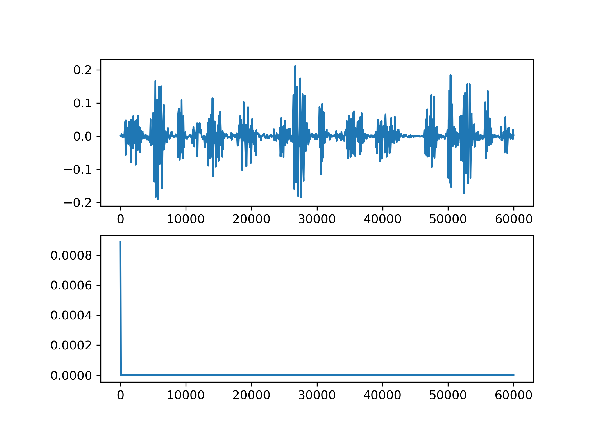

In [267]:
select_experiment_with_rmse(temp_df, 0.042894)

### Figures

In [104]:
# Add mean and std
temp_df2 = exps_rows_df.copy()
temp_df2['M'] = temp_df2.apply(get_M, axis=1)
temp_df2 = aggregate_results(temp_df2, describe=True)

temp_df['result.rmse.mean'] = temp_df2[('result.rmse', 'mean')]
temp_df['result.rmse.std'] = temp_df2[('result.rmse', 'std')]

name_mapping = {
    'DKLGPModel': 'KISS-GP',
    'SGPR': 'SGPR',
    'SSGP': 'SSGP'
}

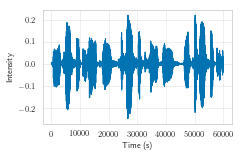

In [110]:
f = NaturalSound()
fig, ax = plt.subplots()
ax.plot(f.X_train, f.Y_train)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity')
savefig(fig, 'scalable/scalability-varying-M-dataset.pdf')

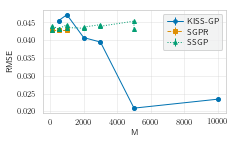

In [105]:
latexify(columns=2)

full_df = temp_df

markers = cycle_markers()
lines = cycle_lines()


fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model']):
    model_df = model_df.sort_values('M')
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']
    ax.errorbar(model_df['M'], mean, yerr=err, label=name_mapping[idx], marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('M')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-M.pdf')

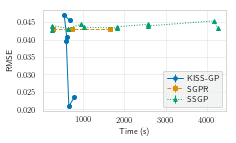

In [106]:
latexify(columns=2)

full_df = temp_df

markers = cycle_markers()
lines = cycle_lines()

fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model']):
    model_df = model_df.sort_values('M')
    time = model_df['result.time:training'] + model_df['result.time:pred']
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']

    ax.errorbar(time, mean, yerr=err, label=name_mapping[idx], marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-M-time.pdf')

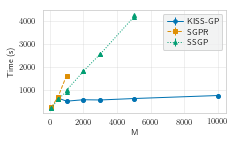

In [107]:
latexify(columns=2)

full_df = temp_df

markers = cycle_markers()
lines = cycle_lines()

fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model']):
    model_df = model_df.sort_values('M')
    time = model_df['result.time:training'] + model_df['result.time:pred']
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']

    ax.errorbar(model_df['M'], time, yerr=err, label=name_mapping[idx], marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('M')
    ax.set_ylabel('Time (s)')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-M-time-vs-M.pdf')

## Scaling N (Natural Sound)

### Create

In [264]:
Ms = [10000, 15000, 20000]
Ns = [59309]

for M in Ms:
    for N in Ns:
        for double in [True, False]:
            run = execute(config_updates={
                'tag': 'natural_sound-N',
                'obj_func': {
                    'name': 'NaturalSound',
                    'kwargs': {'subset_size': N},
                },
                'model': {
                    'name': 'DKLGPModel',
                    'kwargs': {
                        'learning_rate': 0.1,
                        'n_iter': 200,
                        'nn_kwargs': {'layers': None},
                        'gp_kwargs': {'n_grid': M},
                        'max_cg_iter': 3000,
                        'precond_size': 10,
                        'use_double_precision': double,
                        'noise_lower_bound': 1e-10 if double else 1e-4,
                        'use_cg': True,
                        'noise': None
                    }
                }
            })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 59309}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 59309}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_double_precision": False, "noise_lower_bound": 0.0001, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural

In [142]:
M = 10000
Ns = [1000, 5000, 10000, 30000, 59309]

for N in Ns:
    run = execute(config_updates={
        'tag': 'natural_sound-N',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'use_cg': True,
                'noise': None
            }
        }
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 1000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 5000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwar

In [122]:
# ExactGP
Ns = [1000, 5000, 10000, 30000, 59309]

for N in Ns:
    run = execute(config_updates={
        'tag': 'natural_sound-N',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    })


['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 1000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 5000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers

In [205]:
# ExactGP
run = execute(config_updates={
    'tag': 'natural_sound-N',
    'obj_func': {
        'name': 'NaturalSound',
        'kwargs': {'subset_size': 10000},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': None},
            'use_cg': False,
            'use_double_precision': True,
            'noise_lower_bound': 1e-10,
            'noise': None
        }
    }
})

run = execute(config_updates={
    'tag': 'natural_sound-N',
    'obj_func': {
        'name': 'NaturalSound',
        'kwargs': {'subset_size': 10000},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': None},
            'max_cg_iter': 3000,
            'precond_size': 10,
            'use_cg': True,
            'use_double_precision': True,
            'noise_lower_bound': 1e-10,
            'noise': None
        }
    }
})

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "use_cg": False, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}\'']


### View

In [272]:
df = get_df()
exps_rows_df = df[df["tag"] == "natural_sound-N"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
1e9c843c4410f9195fd8f910e327681fd26a6d29,30000.0,None,False,{'exp_hash': '1e9c843c4410f9195fd8f910e327681f...,"Experiment(id=1360, name=lions)",NaturalSound,1360,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.182612,0.027528,17.63,1209.50,natural_sound-N
1e9c843c4410f9195fd8f910e327681fd26a6d29,30000.0,None,False,{'exp_hash': '1e9c843c4410f9195fd8f910e327681f...,"Experiment(id=1327, name=lions)",NaturalSound,1327,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.150653,0.026769,16.01,1273.60,natural_sound-N
23f0aa4a9ed4ff8e801b779b9102bf5f3928e246,1000.0,None,False,{'exp_hash': '23f0aa4a9ed4ff8e801b779b9102bf5f...,"Experiment(id=1324, name=lions)",NaturalSound,1324,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.176104,0.041344,6.45,654.80,natural_sound-N
23f0aa4a9ed4ff8e801b779b9102bf5f3928e246,1000.0,None,False,{'exp_hash': '23f0aa4a9ed4ff8e801b779b9102bf5f...,"Experiment(id=1358, name=lions)",NaturalSound,1358,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169117,0.042825,6.73,712.96,natural_sound-N
2e9b44c2506f143720940821e061de6aaee00255,10000.0,None,False,{'exp_hash': '2e9b44c2506f143720940821e061de6a...,"Experiment(id=1330, name=lions)",NaturalSound,1330,DKLGPModel,None,ba5a551557bc98bcda7f1042f4daf8481c4ae785,DKLGPModel NaturalSound,{'training': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.148654,0.040137,7.14,3214.07,natural_sound-N
3afa59514162fd98377cf472fb34cc0edd988561,10000.0,None,False,{'exp_hash': '3afa59514162fd98377cf472fb34cc0e...,"Experiment(id=1361, name=lions)",NaturalSound,1361,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169435,0.038957,11.81,936.61,natural_sound-N
3afa59514162fd98377cf472fb34cc0edd988561,10000.0,None,False,{'exp_hash': '3afa59514162fd98377cf472fb34cc0e...,"Experiment(id=1325, name=lions)",NaturalSound,1325,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.148888,0.034246,10.43,866.56,natural_sound-N
3d6ce01e9396c3f8d13aa0f55f9d5a703527d5bb,59309.0,None,False,{'exp_hash': '3d6ce01e9396c3f8d13aa0f55f9d5a70...,"Experiment(id=1362, name=lions)",NaturalSound,1362,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.146529,0.022713,24.44,1520.67,natural_sound-N
3d6ce01e9396c3f8d13aa0f55f9d5a703527d5bb,59309.0,None,False,{'exp_hash': '3d6ce01e9396c3f8d13aa0f55f9d5a70...,"Experiment(id=1328, name=lions)",NaturalSound,1328,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.146679,0.022721,23.33,1571.86,natural_sound-N


In [273]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['double', 'model', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  result.max_err  \
double model      M       N       f                                           
False  DKLGPModel 10000.0 1000.0  NaturalSound     0.042084        0.172610   
                          5000.0  NaturalSound     0.041756        0.172869   
                          10000.0 NaturalSound     0.036602        0.159162   
                          30000.0 NaturalSound     0.027149        0.166633   
                          59309.0 NaturalSound     0.022717        0.146604   
                                  NaturalSound     0.022711        0.146487   
                  15000.0 59309.0 NaturalSound     0.008696        0.063544   
                  20000.0 59309.0 NaturalSound     0.036554        0.182045   
                  NaN     1000.0  NaturalSound     0.043150        0.170115   
                                  NaturalSound     0.043405        0.169891   
                          5000.0  NaturalSound     0.041166        0.164584   
                                  NaturalSound     0.042556        0.177594   
                          10000.0 NaturalSound     0.040137        0.148654   
                                  NaturalSound     0.040196        0.150852   
True   DKLGPModel 10000.0 59309.0 NaturalSound     0.021477        0.129090   
                  15000.0 59309.0 NaturalSound     0.008850        0.070352   
                  20000.0 59309.0 NaturalSound     0.035474        0.186655   
                  NaN     10000.0 NaturalSound     0.025723        0.139930   
                                  NaturalSound     0.025102        0.138197   

                                                result.time:training  
double model      M       N       f                                   
False  DKLGPModel 10000.0 1000.0  NaturalSound            683.880000  
                          5000.0  NaturalSound            840.465000  
                          10000.0 NaturalSound            901.585000  
                          30000.0 NaturalSound           1241.550000  
                          59309.0 NaturalSound           1546.265000  
                                  NaturalSound           1607.170000  
                  15000.0 59309.0 NaturalSound           1761.140000  
                  20000.0 59309.0 NaturalSound           2154.580000  
                  NaN     1000.0  NaturalSound             78.530000  
                                  NaturalSound             42.010000  
                          5000.0  NaturalSound           1076.550000  
                                  NaturalSound            947.310000  
                          10000.0 NaturalSound           3214.070000  
                                  NaturalSound           5091.580000  
True   DKLGPModel 10000.0 59309.0 NaturalSound           1815.110000  
                  15000.0 59309.0 NaturalSound           1961.430000  
                  20000.0 59309.0 NaturalSound           2586.560000  
                  NaN     10000.0 NaturalSound          24202.208333  
                                  NaturalSound           1209.221667

{'exp_hash': 'cc21331e09372d91dec831972c23c70ab9d834aa',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'gp_kwargs': {'n_grid': 15000},
                      'learning_rate': 0.1,
                      'max_cg_iter': 3000,
                      'n_iter': 200,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'noise_lower_bound': 0.0001,
                      'precond_size': 10,
                      'use_cg': True,
                      'use_double_precision': False},
           'name': 'DKLGPModel'},
 'model_compare': False,
 'model_hash': 'b53870db40146f31908536a56cb999881b83fc55',
 'obj_func': {'kwargs': {'subset_size': 59309}, 'name': 'NaturalSound'},
 'seed': 977359119,
 'tag': 'natural_sound-N',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[10.978240013122559]],
   'dtype': 'float32'},
  'noise': 0.00010988378926413134,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 0.0023806169629096985,
   'dtype': 'float32'}},
 'max_err': 0.0635438715917104,
 'rmse': 0.008696219439991926,
 'time:pred': 31.069999999999936,
 'time:training': 1761.1399999999999}

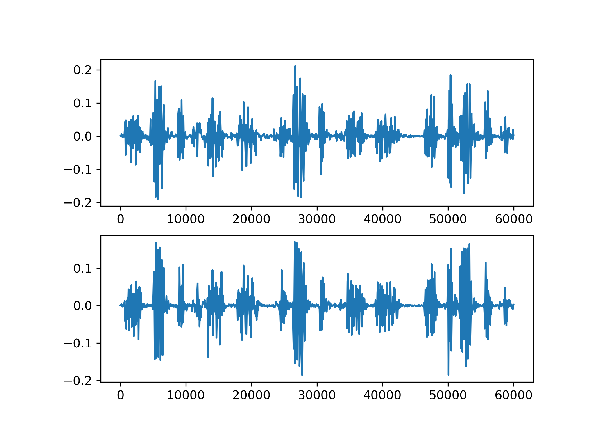

In [275]:
select_experiment_with_rmse(temp_df, 0.008696).result

{'exp_hash': '3d6ce01e9396c3f8d13aa0f55f9d5a703527d5bb',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'gp_kwargs': {'n_grid': 10000},
                      'learning_rate': 0.1,
                      'max_cg_iter': 3000,
                      'n_iter': 200,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'precond_size': 10,
                      'use_cg': True},
           'name': 'DKLGPModel'},
 'model_compare': False,
 'model_hash': 'd876e01b7dc8a8c5333bea777382608adba3b23b',
 'obj_func': {'kwargs': {'subset_size': 59309}, 'name': 'NaturalSound'},
 'seed': 885470509,
 'tag': 'natural_sound-N',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[0.6931472420692444]],
   'dtype': 'float32'},
  'noise': 0.00011145226017106324,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 0.0016022808849811554,
   'dtype': 'float32'}},
 'max_err': 0.14667870531501706,
 'rmse': 0.022720625563595196,
 'time:pred': 23.330000000000155,
 'time:training': 1571.86}

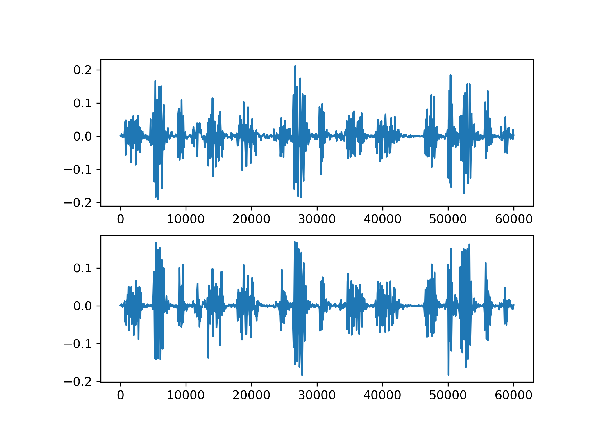

In [233]:
select_experiment_with_rmse(temp_df, 0.022717).result

### Figures

In [90]:
# Add mean and std
temp_df2 = exps_rows_df.copy()
temp_df2['M'] = temp_df2.apply(get_M, axis=1)
temp_df2 = aggregate_results(temp_df2, describe=True)

temp_df['result.rmse.mean'] = temp_df2[('result.rmse', 'mean')]
temp_df['result.rmse.std'] = temp_df2[('result.rmse', 'std')]

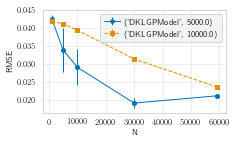

In [91]:
latexify(columns=2)
markers = cycle_markers()
lines = cycle_lines()

full_df = temp_df

fig, ax = plt.subplots()

for idx, model_df in full_df.groupby(['model', 'M']):
    model_df = model_df.sort_values('N')
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']
    #ax.plot(model_df['N'], mean, label=idx, marker=next(markers))
    ax.errorbar(model_df['N'], mean, yerr=err, label=idx, marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('N')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-N.pdf')

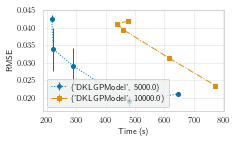

In [92]:
latexify(columns=2)
full_df = temp_df

markers = cycle_markers()

fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model', 'M']):
    model_df = model_df.sort_values('N')
    time = model_df['result.time:training'] + model_df['result.time:pred']
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']
    ax.errorbar(time, mean, yerr=err, label=idx, marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-N-time.pdf')

In [ ]:
# H1: Observe the drop around 19200. When it perfectly aligns with the observations. Biased!

# Inducing points...

## 2D smooth

### Create

In [206]:
# Try double with added noise
Ns = [100]
Ms = [100]

kissmodels = lambda N, M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'eval_cg_tolerance': 1e-5,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
            }
        }
    }
}
    
# Run KISS-GP
for N in Ns:
    for M in Ms:
        run = execute(config_updates={
            'tag': 'scalable-smooth',
            'obj_func': {
                'name': 'Branin',
                'kwargs': {'noise': 5}
            },
            'model': kissmodels(N, M),
            'gp_samples': N ** 2,
            #'use_sample_grid': True,
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin", "kwargs": {"noise": 5}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "eval_cg_tolerance": 1e-05, "use_double_precision": True, "noise_lower_bound": 1e-10}}}}\' \'gp_samples=10000\'']


In [259]:
Ns = [32]
Ms = [100]

kissmodels = lambda N, M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
# Run KISS-GP
for N in Ns:
    for M in Ms:
        run = execute(config_updates={
            'tag': 'scalable-smooth',
            'obj_func': {
                'name': 'Branin',
            },
            'model': kissmodels(N, M),
            'gp_samples': N ** 2,
            #'use_sample_grid': True,
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "eval_cg_tolerance": 1e-05}}}}\' \'gp_samples=1024\'']


In [ ]:
Ns = [10, 32, 50, 100, 140]
Ms = [100, 140, 200]

kissmodels = lambda N, M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
# Run KISS-GP
for N in Ns:
    for M in Ms:
        run = execute(config_updates={
            'tag': 'scalable-smooth',
            'obj_func': {
                'name': 'Branin',
            },
            'model': kissmodels(N, M),
            'gp_samples': N ** 2,
            #'use_sample_grid': True,
        })

In [154]:
# CG with GPyTorch

Ns = [10, 32, 50, 100]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
for N in Ns:
    run = execute(config_updates={
        'tag': 'scalable-smooth',
        'obj_func': {
            'name': 'Branin',
        },
        'model': gp,
        'gp_samples': N ** 2,
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\' \'gp_samples=100\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\' \'g

In [155]:
# exactGP with GPyTorch

Ns = [10, 32, 50, 100]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'use_cg': False,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
            }
        }
    }
}

for N in Ns:
    run = execute(config_updates={
        'tag': 'scalable-smooth',
        'obj_func': {
            'name': 'Branin',
        },
        'model': gp,
        'gp_samples': N ** 2,
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10}}}}\' \'gp_samples=100\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10}}}}\' \'gp_samples=1024\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"

In [156]:
# SGPR 

M = 1000
Ns = [10, 32, 50, 100]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'SGPR',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 10,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'inducing_points': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
for N in Ns:
    run = execute(config_updates={
        'tag': 'scalable-smooth',
        'obj_func': {
            'name': 'Branin',
        },
        'model': gp,
        'gp_samples': N ** 2,
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 1000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\' \'gp_samples=100\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 1000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\'

### View

In [260]:
df = get_df()
exps_rows_df = df[df["tag"] == "scalable-smooth"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
07b37aee9bfa261900cd66843c6322c2d30bbd16,100.0,None,False,{'exp_hash': '07b37aee9bfa261900cd66843c6322c2...,"Experiment(id=1315, name=lions)",Branin,1315,N<DKLGPModel>,None,3ebab13cc0ae39814346b9b7692bdc20ce3b240f,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",8.616459e+00,1.165918,0.11,2.00,scalable-smooth
0ad8e6b72880d1908b3880e67a04adb6705161ed,100.0,None,False,{'exp_hash': '0ad8e6b72880d1908b3880e67a04adb6...,"Experiment(id=1349, name=lions)",Branin,1349,N<DKLGPModel>,None,a7dfa0e6e2332ade387e90726302fc90f8276c4c,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.265131e+01,1.207607,0.09,1.82,scalable-smooth
0b1bb135cb3a3d9d286e7c487ae73e790883f044,10000.0,None,False,{'exp_hash': '0b1bb135cb3a3d9d286e7c487ae73e79...,"Experiment(id=1373, name=lions)",Branin,1373,N<DKLGPModel>,None,7a27abe42d9eb3f1d3653381cee9547c26af6400,N<DKLGPModel> Branin,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",3.859844e+05,120242.055071,207.57,1056.99,scalable-smooth
0b7c69191847ef6b6edfd1e70da97c1d4bac474b,100.0,None,False,{'exp_hash': '0b7c69191847ef6b6edfd1e70da97c1d...,"Experiment(id=1337, name=lions)",Branin,1337,N<DKLGPModel>,None,7c42a68fc34a948b33d0ec1d681de24bc10a45e1,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.424440e+01,6.866274,9.76,531.78,scalable-smooth
0d5c6b500626d7a4980dc5742f9232e8da270da4,1024.0,None,False,{'exp_hash': '0d5c6b500626d7a4980dc5742f9232e8...,"Experiment(id=1299, name=lions)",Branin,1299,N<DKLGPModel>,None,fb8b2aa93ad2f8310bb4c5c758ad48fc6a1a06b7,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.898606e+00,0.392870,16.92,98.37,scalable-smooth
0e4aed49465fc30b517c65ff81afa947801512c6,2500.0,None,False,{'exp_hash': '0e4aed49465fc30b517c65ff81afa947...,"Experiment(id=1302, name=lions)",Branin,1302,N<DKLGPModel>,None,fb8b2aa93ad2f8310bb4c5c758ad48fc6a1a06b7,N<DKLGPModel> Branin,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.218800e+00,0.412104,66.21,129.47,scalable-smooth
19e4bdbdf6669b737062f53bcb292c6d403a84fb,10000.0,None,False,{'exp_hash': '19e4bdbdf6669b737062f53bcb292c6d...,"Experiment(id=1306, name=lions)",Branin,1306,N<DKLGPModel>,None,121664d3c54511ea1cd104b3402cc5abb87836f5,N<DKLGPModel> Branin,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",4.633428e-01,0.101938,197.98,348.74,scalable-smooth
1b582ecaf251fcbdca006946c92305163a227d4b,100.0,None,False,{'exp_hash': '1b582ecaf251fcbdca006946c9230516...,"Experiment(id=1334, name=lions)",Branin,1334,N<DKLGPModel>,None,1ed9a847537dc1b2f67a23d5109c9b0c78a1fb94,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.825482e+01,8.897630,1.79,62.13,scalable-smooth
1b974c18747c738149c9d9d74327d8c7673ecb69,10000.0,None,False,{'exp_hash': '1b974c18747c738149c9d9d74327d8c7...,"Experiment(id=1379, name=lions)",Branin,1379,N<DKLGPModel>,None,c54a2f5da8a3c2b37116264f2e704aaf106854c9,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",9.579924e-02,0.017246,32.09,1094.26,scalable-smooth


In [261]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    return r.config.model.kwargs.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['noise'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.get('noise', None), axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
temp_df['n_iter'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('n_iter', False), axis=1)
temp_df['CG'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_cg', False), axis=1)
temp_df['grid'] = temp_df.apply(lambda r: r.config.get('use_sample_grid', False), axis=1)
view_df(temp_df, indexes=['noise', 'double', 'n_iter', 'model', 'grid', 'M', 'CG', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training', 'result.time:pred']).sort_index()

result.rmse  \
noise double n_iter model         grid  M     CG    N       f                       
5.0   True   100    N<DKLGPModel> False 100.0 True  10000.0 Branin     104.206670   
NaN   False  50     N<DKLGPModel> False 50.0  True  100.0   Branin       6.127022   
                                                    1024.0  Branin       0.392870   
                                                    2500.0  Branin       0.412104   
                                                    10000.0 Branin       0.237181   
                                                    19600.0 Branin       0.120388   
                                        100.0 True  100.0   Branin       2.699344   
                                                    1024.0  Branin       0.363375   
                                                    2500.0  Branin       0.242419   
                                                    10000.0 Branin       0.101938   
                                                    19600.0 Branin       0.090640   
                                        140.0 True  100.0   Branin       2.352232   
                                                    1024.0  Branin       0.553134   
                                                    2500.0  Branin       0.192435   
                                                    10000.0 Branin       0.115474   
                                                    19600.0 Branin       0.093410   
                                        NaN   False 100.0   Branin       1.165918   
                                                    1024.0  Branin       0.393304   
                                                    2500.0  Branin       0.195813   
                                                    10000.0 Branin       0.087791   
                                              True  100.0   Branin       1.151866   
                                                    1024.0  Branin       0.380937   
                                                    2500.0  Branin       0.198093   
                                                    10000.0 Branin       0.188321   
             100    N<DKLGPModel> False 100.0 True  10000.0 Branin  101679.037397   
      True   50     N<DKLGPModel> False 50.0  True  100.0   Branin       8.897630   
                                                    1024.0  Branin       1.423461   
                                                    2500.0  Branin       0.226603   
                                                    10000.0 Branin       0.082546   
                                        100.0 True  100.0   Branin      12.353100   
...                                                                           ...   
                                        140.0 True  100.0   Branin       6.866274   
                                                    1024.0  Branin       0.509020   
                                                    2500.0  Branin       0.207778   
                                                    10000.0 Branin       0.093983   
                                        NaN   False 100.0   Branin       1.042638   
                                                    1024.0  Branin       0.396851   
                                                    2500.0  Branin       0.212265   
                                                    10000.0 Branin       0.082278   
                                              True  100.0   Branin       1.207607   
                                                    1024.0  Branin       0.401179   
                                                    2500.0  Branin       0.176610   
                                                    10000.0 Branin       0.085506   
             100    N<DKLGPModel> False 100.0 True  100.0   Branin       1.868952   
                                                    1024.0  Branin       0.362919   
                                                    2500.0  Branin  116155.

{'exp_hash': '19e4bdbdf6669b737062f53bcb292c6d403a84fb',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 100},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 50,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'precond_size': 10,
                                           'use_cg': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '121664d3c54511ea1cd104b3402cc5abb87836f5',
 'obj_func': {'name': 'Branin'},
 'seed': 886693704,
 'tag': 'scalable-smooth',
 'verbosity': {'bo_show_iter': 30, 'plot': Fals

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.4087018966674805, 0.8830283880233765]],
  'dtype': 'float32'},
 'noise': 0.005595929455012083,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 3.918612480163574,
  'dtype': 'float32'}}

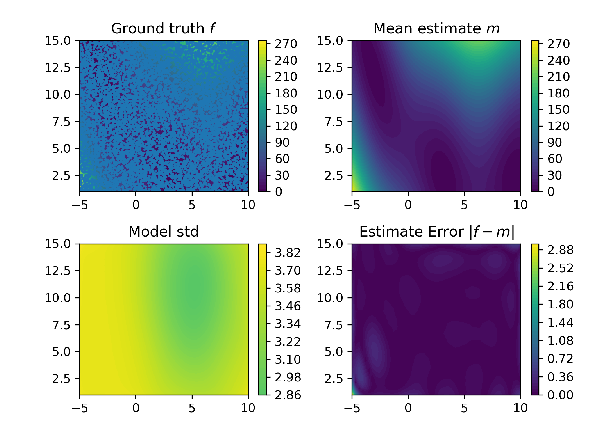

In [214]:
exp = select_experiment_with_rmse(temp_df, 0.101938)
exp.result['hyperparameters']

{'exp_hash': '58806e6938bfb15fb35481c08c41be743ce2dbcf',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 100},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 100,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'precond_size': 10,
                                           'use_cg': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': 'a5f36f3965863ca249a5edd85e13f35e29c406df',
 'obj_func': {'name': 'Branin'},
 'seed': 910804746,
 'tag': 'scalable-smooth',
 'verbosity': {'bo_show_iter': 30, 'plot': Fal

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.8929831981658936, 0.29730162024497986]],
  'dtype': 'float32'},
 'noise': 0.0015558928716927767,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 3.836301326751709,
  'dtype': 'float32'}}

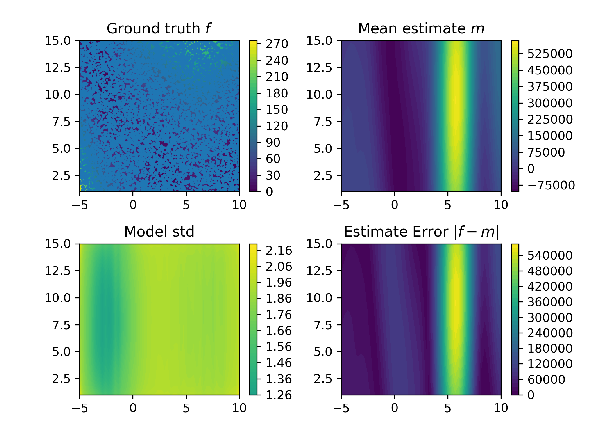

In [213]:
exp = select_experiment_with_rmse(temp_df, 101679.037397)
exp.result['hyperparameters']

{'exp_hash': '6a0fd4cb234612a3c9fc0203f5c7ac0c75a9d65b',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 140},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 50,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'noise_lower_bound': 1e-10,
                                           'precond_size': 10,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '7c42a68fc34a948b33d0ec1d68

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.4234239813530025, 0.8880291250933462]],
  'dtype': 'float64'},
 'noise': 0.00546954151435403,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 4.360226449770031,
  'dtype': 'float64'}}

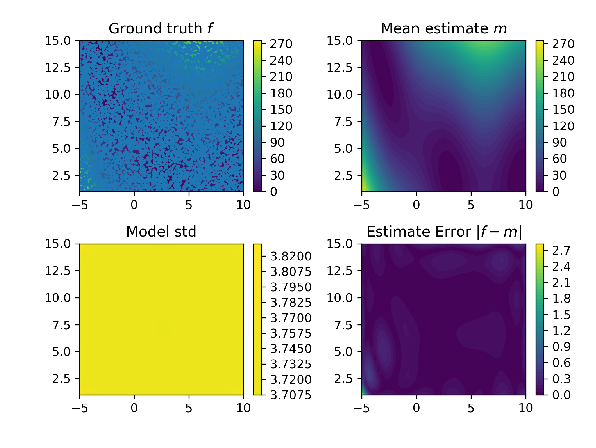

In [191]:
exp = select_experiment_with_rmse(temp_df, 0.093983)
exp.result['hyperparameters']
#exp.metrics['DKLGPModel.training.loss'].plot()


{'exp_hash': '0b1bb135cb3a3d9d286e7c487ae73e790883f044',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 140},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 100,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'noise_lower_bound': 1e-10,
                                           'precond_size': 10,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '7a27abe42d9eb3f1d3653381c

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[4.1703322569216805, 1.0206230750199647]],
  'dtype': 'float64'},
 'noise': 2.977149600649006e-05,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 3.199482738277898,
  'dtype': 'float64'}}

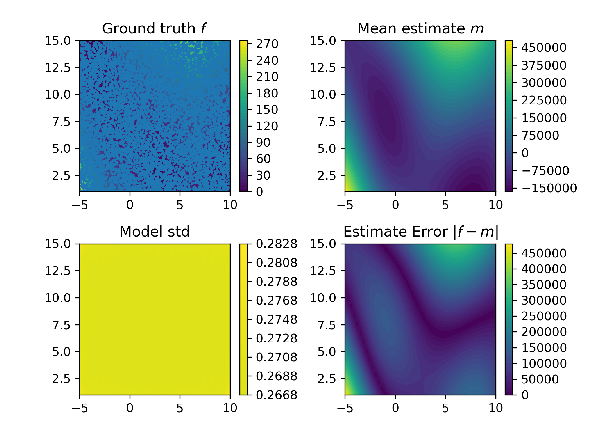

In [190]:
exp = select_experiment_with_rmse(temp_df, 120242.055071)
exp.result['hyperparameters']
#exp.metrics['DKLGPModel.training.loss'].plot()

In [ ]:
# Is 20000 => 8h reasonable?

# GPModel slow on server
# DKLGPModel sends warnings only on server
# DKLGPModel is slow in server

# DKLGPModel does not have good performance... Test performance and speed
    # Run GPytorch: CG, Exact
    # 

# Plot computational space
# Genz 1,2,3, branin, increasingoscillation
# Heston
# SSGP

# Financial

## Heston (scalability)

### Create

In [52]:

Ns = [10, 32, 50, 100, 140]

# gp = lambda N: {
#     'name': 'NormalizerModel',
#     'kwargs': {
#         'model': {
#             'name': 'GPModel',
#             'kwargs': dict(
#                 kernel=dict(
#                     name='GPyRBF',
#                     kwargs={'lengthscale': 0.6, 'ARD': True},
#                 ),
#                 noise_prior=None,
#                 do_optimize=True,
#                 num_mcmc=0,
#             )
#         },
#     }
# }
gp = lambda N: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'use_cg': False,
                #'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'noise': None
            }
        }
    }
}

kissmodels = lambda N: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': N},
                'max_cg_iter': 1500,
                'precond_size': 10,
                #'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-8,
                'use_cg': True,
                'noise': None
            }
        }
    }
}

models = [gp, kissmodels]

for model in models:
    for N in Ns:
        run = execute(config_updates={
            'tag': 'heston',
            'obj_func': {
                'name': 'HestonOptionPricer',
            },
            'model': model(N),
            'gp_samples': N,
            'use_sample_grid': True,
        })

for d in range(1,10):
    run = execute(config_updates={
        'tag': 'heston',
        'obj_func': {
            'name': 'HestonOptionPricer',
        },
        'model': {
            'name': 'AdaptiveSparseGrid',
            'kwargs': dict(
                depth=d, 
                refinement_level=0,
                f_tol=1e-3,
            )
        },
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="heston"\' \'obj_func={"name": "HestonOptionPricer"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}}}\' \'gp_samples=10\' \'use_sample_grid=True\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="heston"\' \'obj_func={"name": "HestonOptionPricer"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}}}\' \'gp_samples=32\' \'use_sample_grid=True\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.

KeyboardInterrupt: 

### View

In [161]:
df = get_df()
exps_rows_df = df[df["tag"] == "heston"].copy()
exps_rows_df = exps_rows_df[exps_rows_df['id'] > 1000]
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1263, name=lions)",HestonOptionPricer,1263,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,AdaptiveSparseGrid HestonOptionPricer,NaN,NaN,0.038383,0.006546,0.02,0.21,heston
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1251, name=lions)",HestonOptionPricer,1251,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,AdaptiveSparseGrid HestonOptionPricer,NaN,NaN,0.038383,0.006546,0.03,0.22,heston
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1081, name=lions)",HestonOptionPricer,1081,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,AdaptiveSparseGrid HestonOptionPricer,NaN,NaN,0.038383,0.006546,0.02,0.23,heston
12b4e4821b92a88b9844cb32642feb72402d0bdb,140.0,None,False,{'exp_hash': '12b4e4821b92a88b9844cb32642feb72...,"Experiment(id=1249, name=lions)",HestonOptionPricer,1249,N<DKLGPModel>,None,f0a235a7e138303c413aa093a770dd7296ce74f0,N<DKLGPModel> HestonOptionPricer,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000419,0.000159,194.54,22499.83,heston
1b970af1f452f08052e0e19820216100f08104ca,32.0,None,False,{'exp_hash': '1b970af1f452f08052e0e19820216100...,"Experiment(id=1242, name=lions)",HestonOptionPricer,1242,N<DKLGPModel>,None,db91661a2f98e0d760245cade196bc8776a00f1a,N<DKLGPModel> HestonOptionPricer,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000313,0.000073,0.93,102.68,heston
21094c2de0667145978fe16d5c58e6df57b4ebc8,10.0,None,False,{'exp_hash': '21094c2de0667145978fe16d5c58e6df...,"Experiment(id=1240, name=lions)",HestonOptionPricer,1240,N<DKLGPModel>,None,db91661a2f98e0d760245cade196bc8776a00f1a,N<DKLGPModel> HestonOptionPricer,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000904,0.000169,0.07,4.87,heston
269a5f1473591ed389b9f55af568973b0c47a4d7,100.0,None,False,{'exp_hash': '269a5f1473591ed389b9f55af568973b...,"Experiment(id=1248, name=lions)",HestonOptionPricer,1248,N<DKLGPModel>,None,79b502bd595de490d520d39bf3eedb1f6dde384c,N<DKLGPModel> HestonOptionPricer,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",0.001073,0.000499,113.14,8184.49,heston
33e7e518a37e5b488136de0c84cccad84aaf4783,32.0,None,False,{'exp_hash': '33e7e518a37e5b488136de0c84cccad8...,"Experiment(id=1256, name=lions)",HestonOptionPricer,1256,N<DKLGPModel>,None,406516ceba5ae22d7ab891c54d5da621de4e381f,N<DKLGPModel> HestonOptionPricer,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000116,0.000029,0.52,98.07,heston
33e7e518a37e5b488136de0c84cccad84aaf4783,32.0,None,False,{'exp_hash': '33e7e518a37e5b488136de0c84cccad8...,"Experiment(id=1270, name=lions)",HestonOptionPricer,1270,N<DKLGPModel>,None,406516ceba5ae22d7ab891c54d5da621de4e381f,N<DKLGPModel> HestonOptionPricer,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000116,0.000029,0.69,102.41,heston


In [164]:
def get_M(r):
    SS_M = r.config.model.kwargs.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    return r.config.model.kwargs.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['CG'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_cg', False), axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
temp_df

,,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag,M,CG,double
exp_hash,Ntemp,,,,,,,,,,,,,,,,,,,,,
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,-1,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1263, name=lions)",HestonOptionPricer,1263,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,NaN,NaN,0.038383,0.006546,0.023333,0.220000,heston,NaN,False,False
12b4e4821b92a88b9844cb32642feb72402d0bdb,140,140.0,None,False,{'exp_hash': '12b4e4821b92a88b9844cb32642feb72...,"Experiment(id=1249, name=lions)",HestonOptionPricer,1249,N<DKLGPModel>,None,f0a235a7e138303c413aa093a770dd7296ce74f0,...,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000419,0.000159,194.540000,22499.830000,heston,140.0,True,False
1b970af1f452f08052e0e19820216100f08104ca,32,32.0,None,False,{'exp_hash': '1b970af1f452f08052e0e19820216100...,"Experiment(id=1242, name=lions)",HestonOptionPricer,1242,N<DKLGPModel>,None,db91661a2f98e0d760245cade196bc8776a00f1a,...,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000313,0.000073,0.930000,102.680000,heston,NaN,False,False
21094c2de0667145978fe16d5c58e6df57b4ebc8,10,10.0,None,False,{'exp_hash': '21094c2de0667145978fe16d5c58e6df...,"Experiment(id=1240, name=lions)",HestonOptionPricer,1240,N<DKLGPModel>,None,db91661a2f98e0d760245cade196bc8776a00f1a,...,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000904,0.000169,0.070000,4.870000,heston,NaN,False,False
269a5f1473591ed389b9f55af568973b0c47a4d7,100,100.0,None,False,{'exp_hash': '269a5f1473591ed389b9f55af568973b...,"Experiment(id=1248, name=lions)",HestonOptionPricer,1248,N<DKLGPModel>,None,79b502bd595de490d520d39bf3eedb1f6dde384c,...,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",0.001073,0.000499,113.140000,8184.490000,heston,100.0,True,False
33e7e518a37e5b488136de0c84cccad84aaf4783,32,32.0,None,False,{'exp_hash': '33e7e518a37e5b488136de0c84cccad8...,"Experiment(id=1256, name=lions)",HestonOptionPricer,1256,N<DKLGPModel>,None,406516ceba5ae22d7ab891c54d5da621de4e381f,...,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000116,0.000029,0.605000,100.240000,heston,NaN,False,True
4803c4cb7ca434fa04f764eb6994544c6a3c574a,10,10.0,None,False,{'exp_hash': '4803c4cb7ca434fa04f764eb6994544c...,"Experiment(id=1246, name=lions)",HestonOptionPricer,1246,N<DKLGPModel>,None,f04ad7678eefcc6b7609b05fc464591dcaec2d65,...,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.001863,0.000297,0.990000,14.430000,heston,10.0,True,False
4c41a709f06becb9b2ba0dc1e6e9d4071917477f,100,100.0,None,False,{'exp_hash': '4c41a709f06becb9b2ba0dc1e6e9d407...,"Experiment(id=1264, name=lions)",HestonOptionPricer,1264,N<DKLGPModel>,None,17cef408076ea5c9457633babf76fa2a9148e9dd,...,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",1292.156266,492.977507,110.220000,1045.350000,heston,100.0,True,True
523010ba3d55fe47451728c096716272107961a5,50,50.0,None,False,{'exp_hash': '523010ba3d55fe47451728c096716272...,"Experiment(id=1241, name=lions)",HestonOptionPricer,1241,N<DKLGPModel>,None,db91661a2f98e0d760245cade196bc8776a00f1a,...,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000340,0.000063,2.490000,637.060000,heston,NaN,False,False


In [165]:
view_df(temp_df, indexes=['double', 'CG', 'model', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
double CG    model              M     N     f                                 
False  False AdaptiveSparseGrid NaN   NaN   HestonOptionPricer     0.006546   
                                            HestonOptionPricer     0.000361   
                                            HestonOptionPricer     0.004169   
                                            HestonOptionPricer     0.001198   
             N<DKLGPModel>      NaN   10.0  HestonOptionPricer     0.000169   
                                      32.0  HestonOptionPricer     0.000073   
                                      50.0  HestonOptionPricer     0.000063   
             N<GPModel>         NaN   10.0  HestonOptionPricer     0.000070   
       True  N<DKLGPModel>      10.0  10.0  HestonOptionPricer     0.000297   
                                20.0  10.0  HestonOptionPricer     0.000166   
                                32.0  32.0  HestonOptionPricer     0.047414   
                                50.0  50.0  HestonOptionPricer     0.000290   
                                64.0  32.0  HestonOptionPricer     0.010254   
                                100.0 50.0  HestonOptionPricer     0.003109   
                                      100.0 HestonOptionPricer     0.000499   
                                140.0 140.0 HestonOptionPricer     0.000159   
                                200.0 100.0 HestonOptionPricer     0.000415   
True   False N<DKLGPModel>      NaN   10.0  HestonOptionPricer     0.000071   
                                      32.0  HestonOptionPricer     0.000029   
                                      50.0  HestonOptionPricer     0.000022   
                                      100.0 HestonOptionPricer     0.000014   
       True  N<DKLGPModel>      10.0  10.0  HestonOptionPricer     0.000386   
                                32.0  32.0  HestonOptionPricer   152.766584   
                                50.0  50.0  HestonOptionPricer    97.711957   
                                100.0 100.0 HestonOptionPricer   492.977507   

                                                                result.max_err  \
double CG    model              M     N     f                                    
False  False AdaptiveSparseGrid NaN   NaN   HestonOptionPricer        0.038383   
                                            HestonOptionPricer        0.002008   
                                            HestonOptionPricer        0.014595   
                                            HestonOptionPricer        0.005747   
             N<DKLGPModel>      NaN   10.0  HestonOptionPricer        0.000904   
                                      32.0  HestonOptionPricer        0.000313   
                                      50.0  HestonOptionPricer        0.000340   
             N<GPModel>         NaN   10.0  HestonOptionPricer        0.000307   
       True  N<DKLGPModel>      10.0  10.0  HestonOptionPricer        0.001863   
                                20.0  10.0  HestonOptionPricer        0.000882   
                                32.0  32.0  HestonOptionPricer        0.070072   
                                50.0  50.0  HestonOptionPricer        0.000665   
                                64.0  32.0  HestonOptionPricer        0.017293   
                                100.0 50.0  HestonOptionPricer        0.005283   
                                      100.0 HestonOptionPricer        0.001073   
                                140.0 140.0 HestonOptionPricer        0.000419   
                                200.0 100.0 HestonOptionPricer        0.001197   
True   False N<DKLGPModel>      NaN   10.0  HestonOptionPricer        0.000322   
                                      32.0  HestonOptionPricer        0.000116   
                                      50.0  HestonOptionPricer        0.000087   
                                      100.0 HestonOptionPricer        0.000060   
       True  N<DKLGPModel>      10.0  10.0  

In [56]:
exp.to_dict()['captured_out']

NameError: name 'exp' is not defined

In [12]:
exp = select_experiment_with_rmse(temp_df, 0.000070)
exp.metrics['DKLGPModel.training.loss'].plot()

{'exp_hash': 'ba882a8486afedc72cab4de8ef7247a3de0bd5dc',
 'gp_samples': 10,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'do_optimize': True,
                                           'kernel': {'kwargs': {'ARD': True,
                                                                 'lengthscale': 0.6},
                                                      'name': 'GPyRBF'},
                                           'noise_prior': None,
                                           'num_mcmc': 0},
                                'name': 'GPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '899fd518bfb4e2a4aea784806654e0748ddf636e',
 'obj_func': {'name': 'HestonOptionPricer'},
 'seed': 273087622,
 'tag': 'heston',
 'use_sample_grid': True,
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



KeyError: 'DKLGPModel.training.loss'

## Growth Model

In [ ]:
# SG
# AS-GP
# DKL

## FORTRAN

### Create

In [34]:
# DKL (+ KISS-GP)
# GP
# (SG would not work)

Ds = [2, 4, 8, 12, 20]

for D in Ds:
    # DKL
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 3000,
                'nn_kwargs': {'layers': [1000, 500, 2]},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    }))

    # GP
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 500,
                'nn_kwargs': {'layers': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    }))
    
    # double GP
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 500,
                'nn_kwargs': {'layers': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'noise': None
            }
        }
    }))

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 2, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 3000, "nn_kwargs": {"layers": [1000, 500, 2]}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 4, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 3000, "nn_kwargs": {"layers": [1000, 500, 2]}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc

### View

In [26]:
df = get_df()
exps_rows_df = df[df["tag"] == "EconomicModel"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
07e679ca5b05865d84547f3d56ed9ba45ddc4eda,NaN,None,False,{'exp_hash': '07e679ca5b05865d84547f3d56ed9ba4...,"Experiment(id=1519, name=lions)",EconomicModel4,1519,N<DKLGPModel>,None,4bbc560eac851535e17e0ac9fe4ddde0bfdaf84f,N<DKLGPModel> EconomicModel4,{'training': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.318012,0.106146,4.86,193.77,EconomicModel
09ae3cb5924202afe42a96e3915a04008ff91d8e,NaN,None,False,{'exp_hash': '09ae3cb5924202afe42a96e3915a0400...,"Experiment(id=1525, name=lions)",EconomicModel20,1525,N<DKLGPModel>,None,4bbc560eac851535e17e0ac9fe4ddde0bfdaf84f,N<DKLGPModel> EconomicModel20,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.174360,0.034281,3.03,620.39,EconomicModel
0f96b46c54b4ea3ce0b898b6e0d62969cf5cef8a,NaN,None,False,{'exp_hash': '0f96b46c54b4ea3ce0b898b6e0d62969...,"Experiment(id=1524, name=lions)",EconomicModel12,1524,N<DKLGPModel>,None,4bbc560eac851535e17e0ac9fe4ddde0bfdaf84f,N<DKLGPModel> EconomicModel12,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",0.569618,0.178264,5.47,336.80,EconomicModel
0fac610304d1bff4c22005165878ebfb5720f939,NaN,None,False,{'exp_hash': '0fac610304d1bff4c22005165878ebfb...,"Experiment(id=1521, name=lions)",EconomicModel8,1521,N<DKLGPModel>,None,899d99b6eb30cd5cc53350d2ac2a17f0cfe59cc2,N<DKLGPModel> EconomicModel8,{'training': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.004393,0.001233,1.55,465.58,EconomicModel
23814cfb61280b2d0985dd693242b35cb871c168,NaN,None,False,{'exp_hash': '23814cfb61280b2d0985dd693242b35c...,"Experiment(id=1518, name=lions)",EconomicModel4,1518,N<DKLGPModel>,None,899d99b6eb30cd5cc53350d2ac2a17f0cfe59cc2,N<DKLGPModel> EconomicModel4,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",0.353383,0.305014,3.51,374.97,EconomicModel
2e3a2f32ed54443f1f69b92c1e5b9120565d1b6d,NaN,None,False,{'exp_hash': '2e3a2f32ed54443f1f69b92c1e5b9120...,"Experiment(id=1523, name=lions)",EconomicModel8,1523,N<DKLGPModel>,None,49e2ef21881ef0ac42a95da49f71a00edaff3d05,N<DKLGPModel> EconomicModel8,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.005779,0.001429,4.09,164.70,EconomicModel
2f2a7a01796ed8d55e90fc71b86933b5274f0cb1,NaN,None,False,{'exp_hash': '2f2a7a01796ed8d55e90fc71b86933b5...,"Experiment(id=1520, name=lions)",EconomicModel4,1520,N<DKLGPModel>,None,49e2ef21881ef0ac42a95da49f71a00edaff3d05,N<DKLGPModel> EconomicModel4,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.003578,0.001415,2.43,126.81,EconomicModel
327a47cf090c94a3a64ff73a29b44abe3c513f0a,NaN,None,False,{'exp_hash': '327a47cf090c94a3a64ff73a29b44abe...,"Experiment(id=1529, name=lions)",EconomicModel20,1529,N<DKLGPModel>,None,899d99b6eb30cd5cc53350d2ac2a17f0cfe59cc2,N<DKLGPModel> EconomicModel20,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.002883,0.000853,1.42,237.85,EconomicModel
380832f630e5e995d9c87958bf621bc285a8322f,NaN,None,False,{'exp_hash': '380832f630e5e995d9c87958bf621bc2...,"Experiment(id=1516, name=lions)",EconomicModel2,1516,N<DKLGPModel>,None,899d99b6eb30cd5cc53350d2ac2a17f0cfe59cc2,N<DKLGPModel> EconomicModel2,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000493,0.000174,7.24,319.24,EconomicModel


In [33]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)

temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)

temp_df['f.D'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.D, axis=1)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['f.D', 'model', 'double', 'layers', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
f.D model         double layers       M   N   f                              
2   DKLGPModel    False  ()           NaN NaN EconomicModel2      0.000831   
                                              EconomicModel2      0.000272   
                  True   ()           NaN NaN EconomicModel2      0.000493   
    N<DKLGPModel> False  ()           NaN NaN EconomicModel2      0.000174   
                                              EconomicModel2      0.000116   
                         (100, 50, 2) NaN NaN EconomicModel2      0.000121   
4   N<DKLGPModel> False  ()           NaN NaN EconomicModel4      0.305014   
                                              EconomicModel4      0.001415   
                         (100, 50, 2) NaN NaN EconomicModel4      0.106146   
8   N<DKLGPModel> False  ()           NaN NaN EconomicModel8      0.001233   
                                              EconomicModel8      0.001429   
                         (100, 50, 2) NaN NaN EconomicModel8      0.100911   
12  N<DKLGPModel> False  ()           NaN NaN EconomicModel12     0.001247   
                                              EconomicModel12     0.001235   
                         (100, 50, 2) NaN NaN EconomicModel12     0.178264   
20  N<DKLGPModel> False  ()           NaN NaN EconomicModel20     0.000853   
                                              EconomicModel20     0.000939   
                         (100, 50, 2) NaN NaN EconomicModel20     0.034281   

                                                               result.max_err  \
f.D model         double layers       M   N   f                                 
2   DKLGPModel    False  ()           NaN NaN EconomicModel2         0.001853   
                                              EconomicModel2         0.000712   
                  True   ()           NaN NaN EconomicModel2         0.001096   
    N<DKLGPModel> False  ()           NaN NaN EconomicModel2         0.000493   
                                              EconomicModel2         0.000402   
                         (100, 50, 2) NaN NaN EconomicModel2         0.000440   
4   N<DKLGPModel> False  ()           NaN NaN EconomicModel4         0.353383   
                                              EconomicModel4         0.003578   
                         (100, 50, 2) NaN NaN EconomicModel4         0.318012   
8   N<DKLGPModel> False  ()           NaN NaN EconomicModel8         0.004393   
                                              EconomicModel8         0.005779   
                         (100, 50, 2) NaN NaN EconomicModel8         0.196445   
12  N<DKLGPModel> False  ()           NaN NaN EconomicModel12        0.004095   
                                              EconomicModel12        0.003316   
                         (100, 50, 2) NaN NaN EconomicModel12        0.569618   
20  N<DKLGPModel> False  ()           NaN NaN EconomicModel20        0.002883   
                                              EconomicModel20        0.002858   
                         (100, 50, 2) NaN NaN EconomicModel20        0.174360   

                                                               result.time:training  
f.D model         double layers       M   N   f                                      
2   DKLGPModel    False  ()           NaN NaN EconomicModel2                 295.67  
                                              EconomicModel2                 506.40  
                  True   ()           NaN NaN EconomicModel2                 600.86  
    N<DKLGPModel> False  ()           NaN NaN EconomicModel2                 319.24  
                                              EconomicModel2                 603.40  
                         (100, 50, 2) NaN NaN EconomicModel2                1866.75  
4   N<DKLGPModel> False  ()           NaN NaN EconomicModel4                 374.97  
                                              EconomicModel4                 126.81  
                     

## AAPL

### Create

In [ ]:
# So noisy we don't need double precision

In [279]:
AAPL().X_train.shape

(139360, 2)

In [21]:
for M in np.sqrt([10000, 20000, 40000, 100000]):
    print(int(M))

100
141
200
316


In [23]:
# Testing DKL for feature learning 2->2 (3->2)
# DKL + KISS-GP
# DKL
# GP

Ns = [10000, 50000, 139360]
Ms = np.sqrt([10000, 20000, 40000, 100000])

for M in Ms:
    M = int(M)
    for N in Ns:
        run = execute(config_updates=normalize_config({
            'tag': 'AAPL',
            'obj_func': {
                'name': 'AAPL',
                'kwargs': {'subset_size': N},
            },
            'model': {
                'name': 'DKLGPModel',
                'kwargs': {
                    'learning_rate': 0.1,
                    'n_iter': 200,
                    'nn_kwargs': {'layers': [100, 50, 2]},
                    'gp_kwargs': {'n_grid': M},
                    'max_cg_iter': 3000,
                    'precond_size': 10,
                    'use_cg': True,
                    'noise': None
                }
            }
        }))

        
Ns = [5000, 10000, 50000]
for N in Ns:
    run = execute(config_updates=normalize_config({
        'tag': 'AAPL',
        'obj_func': {
            'name': 'AAPL',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': [100, 50, 2]},
                'gp_kwargs': {'n_grid': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    }))

    run = execute(config_updates=normalize_config({
        'tag': 'AAPL',
        'obj_func': {
            'name': 'AAPL',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    }))

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="AAPL"\' \'obj_func={"name": "AAPL", "kwargs": {"subset_size": 10000}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": [100, 50, 2]}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="AAPL"\' \'obj_func={"name": "AAPL", "kwargs": {"subset_size": 50000}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": [100, 50, 2]}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\'']
['ssh', 'simba', 'cd mthesis; sbat

## View

In [24]:
df = get_df()
exps_rows_df = df[df["tag"] == "AAPL"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
1455df7844453cf8071b5193334f92560d71b0a7,10000.0,None,False,{'exp_hash': '1455df7844453cf8071b5193334f9256...,"Experiment(id=1497, name=lions)",AAPL,1497,DKLGPModel,None,ee7a6bb62702a589fd2e46e8ba3d84fe87dd9f2e,DKLGPModel AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.474405,0.041657,17.37,1435.78,AAPL
19d602bab444e4be0fcd2eb5f1cdc817ba7191f2,5000.0,None,False,{'exp_hash': '19d602bab444e4be0fcd2eb5f1cdc817...,"Experiment(id=1543, name=lions)",AAPL,1543,N<DKLGPModel>,None,7a77069d09481b84e6e71cd97c4a3b36a020fe7f,N<DKLGPModel> AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.352887,0.041269,4.01,459.05,AAPL
2aae1dd1365474143b3c7fc6f45556c08ae5e1ed,10000.0,None,False,{'exp_hash': '2aae1dd1365474143b3c7fc6f45556c0...,"Experiment(id=1546, name=lions)",AAPL,1546,N<DKLGPModel>,None,019c5d98960573fcda59ccfa637c2e5e277112f8,N<DKLGPModel> AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.353947,0.041156,7.43,1144.78,AAPL
47711fcbe4a5bd57dbe4c7d5a4d22f35212ecb4d,10000.0,None,False,{'exp_hash': '47711fcbe4a5bd57dbe4c7d5a4d22f35...,"Experiment(id=1544, name=lions)",AAPL,1544,N<DKLGPModel>,None,7a77069d09481b84e6e71cd97c4a3b36a020fe7f,N<DKLGPModel> AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.352181,0.041224,7.73,1097.94,AAPL
51fa086a18e103a2530853fad2d5827ce482fb87,5000.0,None,False,{'exp_hash': '51fa086a18e103a2530853fad2d5827c...,"Experiment(id=1542, name=lions)",AAPL,1542,N<DKLGPModel>,None,019c5d98960573fcda59ccfa637c2e5e277112f8,N<DKLGPModel> AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.354309,0.041156,2.89,333.63,AAPL
9475e459289affb6d3eee7ec6cdbfc97e852749f,5000.0,None,False,{'exp_hash': '9475e459289affb6d3eee7ec6cdbfc97...,"Experiment(id=1495, name=lions)",AAPL,1495,DKLGPModel,None,ee7a6bb62702a589fd2e46e8ba3d84fe87dd9f2e,DKLGPModel AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.483712,0.041809,7.77,533.74,AAPL
c182d16d0ed28a5c8e4195f46660e00252e83a92,5000.0,None,False,{'exp_hash': 'c182d16d0ed28a5c8e4195f46660e002...,"Experiment(id=1494, name=lions)",AAPL,1494,DKLGPModel,None,b6f7780666671c5b408d656e849346e6f8c0f5ef,DKLGPModel AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.479213,0.041453,2.84,413.21,AAPL
e82856ba852592721744fe380f4473fe28b7103d,10000.0,None,False,{'exp_hash': 'e82856ba852592721744fe380f4473fe...,"Experiment(id=1496, name=lions)",AAPL,1496,DKLGPModel,None,b6f7780666671c5b408d656e849346e6f8c0f5ef,DKLGPModel AAPL,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.481844,0.041470,8.63,1052.93,AAPL


In [25]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)


temp_df = aggregate_results(exps_rows_df)
temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)

temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['double', 'model', 'layers', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
double model         layers       M   N       f                   
False  DKLGPModel    ()           NaN 5000.0  AAPL     0.041809   
                                              AAPL     0.041453   
                                      10000.0 AAPL     0.041657   
                                              AAPL     0.041470   
       N<DKLGPModel> ()           NaN 5000.0  AAPL     0.041156   
                                      10000.0 AAPL     0.041156   
                     (100, 50, 2) NaN 5000.0  AAPL     0.041269   
                                      10000.0 AAPL     0.041224   

                                                    result.max_err  \
double model         layers       M   N       f                      
False  DKLGPModel    ()           NaN 5000.0  AAPL        0.483712   
                                              AAPL        0.479213   
                                      10000.0 AAPL        0.474405   
                                              AAPL        0.481844   
       N<DKLGPModel> ()           NaN 5000.0  AAPL        0.354309   
                                      10000.0 AAPL        0.353947   
                     (100, 50, 2) NaN 5000.0  AAPL        0.352887   
                                      10000.0 AAPL        0.352181   

                                                    result.time:training  
double model         layers       M   N       f                           
False  DKLGPModel    ()           NaN 5000.0  AAPL                533.74  
                                              AAPL                413.21  
                                      10000.0 AAPL               1435.78  
                                              AAPL               1052.93  
       N<DKLGPModel> ()           NaN 5000.0  AAPL                333.63  
                                      10000.0 AAPL               1144.78  
                     (100, 50, 2) NaN 5000.0  AAPL                459.05  
                                      10000.0 AAPL               1097.94